<a href="https://colab.research.google.com/github/Ubaldo-Yareli/M-todos-numericos/blob/main/Polinomio_Osculante_de_Hermite_con_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En el polinomio de Hermite, se utilizan ciertos valores de $x$ evaluados en un polinomio, es decir $f(x)$ y esos mismos valores de $x$ evaluados en la primera derivada de ese polinomio, es decir, $f'(x)$.

Al realizar la tabla, se repiten dos veces los valores de cada $f(x)$, en este caso, los valores de $0.6200860$, $0.4554022$ y $0.2818186$, y se denominan como $f[z_0]$, $f[z_1]$, etc. posteriomente, se encuentra las primeras diferencias divididas, las cuales, son ya sea la evaluacion en la primera derivada cuando los valores de $f(x)$ son los mismos o con la fórmula $f[z_1,z_2]=$$\frac{f[z_2]-f[z_1]}{z_2-z_1}$, cambiando los subíndices dependiendo de los valores de $f[z]$ que estén siendo utilizados.


El polinomio de Hermite se encuentra con la fórmula $H_{2n+1}(x)=f[z_0]+\sum_{k=1}^{2n+1}f[z_0,..., z_k](x - z_0)(x - z_1)...(x - z_{k-1}).$


Tabla de diferencias divididas:
[[ 0.620086    0.          0.          0.          0.          0.        ]
 [ 0.620086   -0.5220232   0.          0.          0.          0.        ]
 [ 0.4554022  -0.548946   -0.08974267  0.          0.          0.        ]
 [ 0.4554022  -0.5698959  -0.069833    0.06636556  0.          0.        ]
 [ 0.2818186  -0.578612   -0.02905367  0.06796556  0.00266667  0.        ]
 [ 0.2818186  -0.5811571  -0.00848367  0.06856667  0.00100185 -0.00277469]]
Polinomio de Hermite simplificado:
                       5                       4                       3                      2    ↪
- 0.00277469135798944⋅x  + 0.0240317901231809⋅x  - 0.0145560802460553⋅x  - 0.235216169754413⋅x  -  ↪

↪                                         
↪ 0.00822922345577154⋅x + 1.00194406469105

El valor del polinomio evaluado en 1.5 es aproximadamente 0.511827701728395


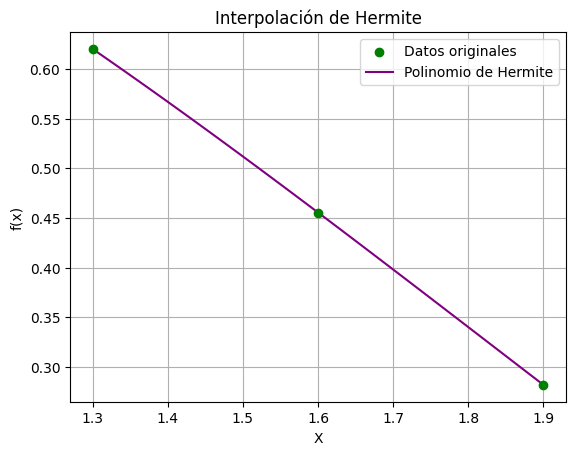

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#Datos que se ocuparán
X=np.array([1.3, 1.6, 1.9])
fx=np.array([0.6200860, 0.4554022, 0.2818186])
derivada1x=np.array([-0.5220232, -0.5698959, -0.5811571])

#Crear las variables simbólicas
n=len(X)
z=np.zeros(2*len(X))  # Array z duplicando los valores de x
Q=np.zeros((2*len(X), 2*len(X)))  # Tabla de diferencias divididas

#Paso 1:Crear la tabla z y Q
for i in range(n):
    z[2*i]=z[2*i+1]=X[i]
    Q[2*i][0]=Q[2*i+1][0]=fx[i]
    Q[2*i+1][1]=derivada1x[i]
    if i!=0:
        Q[2*i][1]=(Q[2*i][0]-Q[2*i-1][0])/(z[2*i]-z[2*i-1])

#Paso 2:Llenar la tabla de diferencias divididas
for i in range(2, 2*n):
    for j in range(2, i+1):
        Q[i][j]=(Q[i][j-1]-Q[i-1][j-1])/(z[i]-z[i-j])

#Mostrar la tabla de diferencias divididas
print("Tabla de diferencias divididas:")
print(Q)

#Crea el polinomio de Hermite simbólicamente
x=sp.symbols('x')
polinomio_hermite=Q[0][0]

#Construcción del polinomio
for i in range(1, 2*n):
    term=Q[i][i]
    for j in range(i):
        term*=(x-z[j])
    polinomio_hermite+=term

#Simplificar el polinomio
polinomio_hermite_simplificado=sp.simplify(polinomio_hermite)
print("Polinomio de Hermite simplificado:")
sp.pprint(polinomio_hermite_simplificado)

#Evaluar el polinomio en un punto
evaluacion=1.5
valor=polinomio_hermite_simplificado.subs(x, evaluacion)
print(f"\nEl valor del polinomio evaluado en {evaluacion} es aproximadamente {valor}")

#Creación de l gráfica
f_polinomio_hermite=sp.lambdify(x, polinomio_hermite_simplificado, 'numpy')
x_valores=np.linspace(min(X), max(X), 100)
y_valores= f_polinomio_hermite(x_valores)
plt.scatter(X, fx, color="green", label="Datos originales", zorder=5)
plt.plot(x_valores, y_valores, label="Polinomio de Hermite", color="purple")
plt.xlabel('X')
plt.ylabel('f(x)')
plt.title('Interpolación de Hermite')
plt.legend()
plt.grid()
plt.show()